In [1]:
### imports #####
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data_post_eda.csv")
df = df.drop(columns=['Unnamed: 0', 'feel'])
df.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,valid,vsby,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
0,30.099997,0.0,54.479617,1018.399996,94.332984,0.0,57.7,27-11-2020 00:15,5.300603,1,0,0,0,0
1,30.115998,0.0,53.059670,1018.899996,96.243318,0.0,55.4,27-11-2020 01:15,4.550471,1,0,0,0,0
2,30.118331,0.0,51.133041,1018.899996,97.334575,0.0,53.2,27-11-2020 02:15,2.958530,0,0,0,0,1
3,30.111109,0.0,49.833252,1019.000000,97.255306,0.0,51.1,27-11-2020 03:01,2.416838,1,0,0,0,0
4,30.107498,0.0,47.768617,1019.000000,97.175395,0.0,48.9,27-11-2020 04:01,1.453117,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   alti       8737 non-null   float64
 1   drct       8737 non-null   float64
 2   dwpf       8737 non-null   float64
 3   mslp       8737 non-null   float64
 4   relh       8737 non-null   float64
 5   sknt       8737 non-null   float64
 6   tmpf       8737 non-null   float64
 7   valid      8737 non-null   object 
 8   vsby       8737 non-null   float64
 9   skyc1_CLR  8737 non-null   int64  
 10  skyc1_FEW  8737 non-null   int64  
 11  skyc1_OVC  8737 non-null   int64  
 12  skyc1_SCT  8737 non-null   int64  
 13  skyc1_VV   8737 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 955.7+ KB


## Dataset creation for timeseries

### We chose a window length equal to 5
### Features for the dataset include :

In [4]:
time_df = df.copy()

window_length = 6
i = 1
while i < window_length:
    for column in df.columns:
        if column in ['valid']:
            continue
        time_df[f'{column}_t-{i}'] = time_df[column].shift(-(i))
        #### Comment the above line and uncomment the below line for 24 hours prediction.
        ### time_df[f'{column}_t-{i}'] = time_df[column].shift(-(24*i))
    i = i + 1
time_df.columns

Index(['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf', 'valid', 'vsby',
       'skyc1_CLR', 'skyc1_FEW', 'skyc1_OVC', 'skyc1_SCT', 'skyc1_VV ',
       'alti_t-1', 'drct_t-1', 'dwpf_t-1', 'mslp_t-1', 'relh_t-1', 'sknt_t-1',
       'tmpf_t-1', 'vsby_t-1', 'skyc1_CLR_t-1', 'skyc1_FEW_t-1',
       'skyc1_OVC_t-1', 'skyc1_SCT_t-1', 'skyc1_VV _t-1', 'alti_t-2',
       'drct_t-2', 'dwpf_t-2', 'mslp_t-2', 'relh_t-2', 'sknt_t-2', 'tmpf_t-2',
       'vsby_t-2', 'skyc1_CLR_t-2', 'skyc1_FEW_t-2', 'skyc1_OVC_t-2',
       'skyc1_SCT_t-2', 'skyc1_VV _t-2', 'alti_t-3', 'drct_t-3', 'dwpf_t-3',
       'mslp_t-3', 'relh_t-3', 'sknt_t-3', 'tmpf_t-3', 'vsby_t-3',
       'skyc1_CLR_t-3', 'skyc1_FEW_t-3', 'skyc1_OVC_t-3', 'skyc1_SCT_t-3',
       'skyc1_VV _t-3', 'alti_t-4', 'drct_t-4', 'dwpf_t-4', 'mslp_t-4',
       'relh_t-4', 'sknt_t-4', 'tmpf_t-4', 'vsby_t-4', 'skyc1_CLR_t-4',
       'skyc1_FEW_t-4', 'skyc1_OVC_t-4', 'skyc1_SCT_t-4', 'skyc1_VV _t-4',
       'alti_t-5', 'drct_t-5', 'dwpf_t-5', 'msl

In [5]:
time_df.filter(items=['valid','valid_t-1','valid_t-2'])[30:40]

,valid
30,28-11-2020 06:10
31,28-11-2020 07:15
32,28-11-2020 08:14
33,28-11-2020 09:15
34,28-11-2020 10:15
35,28-11-2020 11:15
36,28-11-2020 12:15
37,28-11-2020 13:15
38,28-11-2020 14:15
39,28-11-2020 15:15


In [6]:
#future_window_length = 3
#i = 1
#while i < future_window_length:
#    time_df[f'vsby_t_{i}'] = time_df['vsby'].shift(i)
#    i = i+1

In [7]:
time_df.columns

Index(['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf', 'valid', 'vsby',
       'skyc1_CLR', 'skyc1_FEW', 'skyc1_OVC', 'skyc1_SCT', 'skyc1_VV ',
       'alti_t-1', 'drct_t-1', 'dwpf_t-1', 'mslp_t-1', 'relh_t-1', 'sknt_t-1',
       'tmpf_t-1', 'vsby_t-1', 'skyc1_CLR_t-1', 'skyc1_FEW_t-1',
       'skyc1_OVC_t-1', 'skyc1_SCT_t-1', 'skyc1_VV _t-1', 'alti_t-2',
       'drct_t-2', 'dwpf_t-2', 'mslp_t-2', 'relh_t-2', 'sknt_t-2', 'tmpf_t-2',
       'vsby_t-2', 'skyc1_CLR_t-2', 'skyc1_FEW_t-2', 'skyc1_OVC_t-2',
       'skyc1_SCT_t-2', 'skyc1_VV _t-2', 'alti_t-3', 'drct_t-3', 'dwpf_t-3',
       'mslp_t-3', 'relh_t-3', 'sknt_t-3', 'tmpf_t-3', 'vsby_t-3',
       'skyc1_CLR_t-3', 'skyc1_FEW_t-3', 'skyc1_OVC_t-3', 'skyc1_SCT_t-3',
       'skyc1_VV _t-3', 'alti_t-4', 'drct_t-4', 'dwpf_t-4', 'mslp_t-4',
       'relh_t-4', 'sknt_t-4', 'tmpf_t-4', 'vsby_t-4', 'skyc1_CLR_t-4',
       'skyc1_FEW_t-4', 'skyc1_OVC_t-4', 'skyc1_SCT_t-4', 'skyc1_VV _t-4',
       'alti_t-5', 'drct_t-5', 'dwpf_t-5', 'msl

### Drop t=0 features and we use visby (visibility) at t=0 as the Output variable

In [8]:
drop_columns = ['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf', 'skyc1_CLR', 'skyc1_FEW', 'skyc1_OVC', 'skyc1_SCT', 'skyc1_VV ']
time_df = time_df.drop(columns=drop_columns)
time_df = time_df[5:]
time_df.head()

,valid,vsby,alti_t-1,drct_t-1,dwpf_t-1,mslp_t-1,relh_t-1,sknt_t-1,tmpf_t-1,vsby_t-1,...,mslp_t-5,relh_t-5,sknt_t-5,tmpf_t-5,vsby_t-5,skyc1_CLR_t-5,skyc1_FEW_t-5,skyc1_OVC_t-5,skyc1_SCT_t-5,skyc1_VV _t-5
5,27-11-2020 05:03,2.083435,30.113569,0.0,44.778475,1019.0,95.008211,0.0,46.9,1.589372,...,1019.5,95.199306,0.000000,41.0,3.071414,0.0,0.0,0.0,0.0,1.0
6,27-11-2020 06:04,1.589372,30.117271,0.0,44.408948,1019.2,96.767850,0.0,46.0,2.909136,...,1020.0,98.119497,0.750201,40.3,5.312918,0.0,0.0,0.0,0.0,1.0
7,27-11-2020 07:00,2.909136,30.118460,0.0,42.884448,1019.4,96.668959,0.0,44.1,2.076974,...,1020.7,98.762238,1.500134,39.9,4.999911,1.0,0.0,0.0,0.0,0.0
8,27-11-2020 08:02,2.076974,30.118998,0.0,41.510859,1019.2,96.250696,0.0,42.1,2.472041,...,1021.2,97.609594,0.000000,44.2,9.250067,1.0,0.0,0.0,0.0,0.0
9,27-11-2020 09:07,2.472041,30.122497,0.0,40.485513,1019.5,95.199306,0.0,41.0,3.071414,...,1021.4,85.465487,0.000000,51.8,10.000000,1.0,0.0,0.0,0.0,0.0


In [9]:
time_df.columns

Index(['valid', 'vsby', 'alti_t-1', 'drct_t-1', 'dwpf_t-1', 'mslp_t-1',
       'relh_t-1', 'sknt_t-1', 'tmpf_t-1', 'vsby_t-1', 'skyc1_CLR_t-1',
       'skyc1_FEW_t-1', 'skyc1_OVC_t-1', 'skyc1_SCT_t-1', 'skyc1_VV _t-1',
       'alti_t-2', 'drct_t-2', 'dwpf_t-2', 'mslp_t-2', 'relh_t-2', 'sknt_t-2',
       'tmpf_t-2', 'vsby_t-2', 'skyc1_CLR_t-2', 'skyc1_FEW_t-2',
       'skyc1_OVC_t-2', 'skyc1_SCT_t-2', 'skyc1_VV _t-2', 'alti_t-3',
       'drct_t-3', 'dwpf_t-3', 'mslp_t-3', 'relh_t-3', 'sknt_t-3', 'tmpf_t-3',
       'vsby_t-3', 'skyc1_CLR_t-3', 'skyc1_FEW_t-3', 'skyc1_OVC_t-3',
       'skyc1_SCT_t-3', 'skyc1_VV _t-3', 'alti_t-4', 'drct_t-4', 'dwpf_t-4',
       'mslp_t-4', 'relh_t-4', 'sknt_t-4', 'tmpf_t-4', 'vsby_t-4',
       'skyc1_CLR_t-4', 'skyc1_FEW_t-4', 'skyc1_OVC_t-4', 'skyc1_SCT_t-4',
       'skyc1_VV _t-4', 'alti_t-5', 'drct_t-5', 'dwpf_t-5', 'mslp_t-5',
       'relh_t-5', 'sknt_t-5', 'tmpf_t-5', 'vsby_t-5', 'skyc1_CLR_t-5',
       'skyc1_FEW_t-5', 'skyc1_OVC_t-5', 'skyc1_SCT_t-5

In [10]:
time_df = time_df.dropna()
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8727 entries, 5 to 8731
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valid          8727 non-null   object 
 1   vsby           8727 non-null   float64
 2   alti_t-1       8727 non-null   float64
 3   drct_t-1       8727 non-null   float64
 4   dwpf_t-1       8727 non-null   float64
 5   mslp_t-1       8727 non-null   float64
 6   relh_t-1       8727 non-null   float64
 7   sknt_t-1       8727 non-null   float64
 8   tmpf_t-1       8727 non-null   float64
 9   vsby_t-1       8727 non-null   float64
 10  skyc1_CLR_t-1  8727 non-null   float64
 11  skyc1_FEW_t-1  8727 non-null   float64
 12  skyc1_OVC_t-1  8727 non-null   float64
 13  skyc1_SCT_t-1  8727 non-null   float64
 14  skyc1_VV _t-1  8727 non-null   float64
 15  alti_t-2       8727 non-null   float64
 16  drct_t-2       8727 non-null   float64
 17  dwpf_t-2       8727 non-null   float64
 18  mslp_t-2

In [11]:
time_df.to_csv('time_series_t_3.csv')

### Training dataset

In [12]:
cols = time_df.columns.to_list()
cols.remove('vsby')
X = time_df[cols]
Y = time_df['vsby']

In [13]:
X.head()

,valid,alti_t-1,drct_t-1,dwpf_t-1,mslp_t-1,relh_t-1,sknt_t-1,tmpf_t-1,vsby_t-1,skyc1_CLR_t-1,...,mslp_t-5,relh_t-5,sknt_t-5,tmpf_t-5,vsby_t-5,skyc1_CLR_t-5,skyc1_FEW_t-5,skyc1_OVC_t-5,skyc1_SCT_t-5,skyc1_VV _t-5
5,27-11-2020 05:03,30.113569,0.0,44.778475,1019.0,95.008211,0.0,46.9,1.589372,0.0,...,1019.5,95.199306,0.000000,41.0,3.071414,0.0,0.0,0.0,0.0,1.0
6,27-11-2020 06:04,30.117271,0.0,44.408948,1019.2,96.767850,0.0,46.0,2.909136,1.0,...,1020.0,98.119497,0.750201,40.3,5.312918,0.0,0.0,0.0,0.0,1.0
7,27-11-2020 07:00,30.118460,0.0,42.884448,1019.4,96.668959,0.0,44.1,2.076974,1.0,...,1020.7,98.762238,1.500134,39.9,4.999911,1.0,0.0,0.0,0.0,0.0
8,27-11-2020 08:02,30.118998,0.0,41.510859,1019.2,96.250696,0.0,42.1,2.472041,0.0,...,1021.2,97.609594,0.000000,44.2,9.250067,1.0,0.0,0.0,0.0,0.0
9,27-11-2020 09:07,30.122497,0.0,40.485513,1019.5,95.199306,0.0,41.0,3.071414,0.0,...,1021.4,85.465487,0.000000,51.8,10.000000,1.0,0.0,0.0,0.0,0.0


In [14]:
Y.head()

5    2.083435
6    1.589372
7    2.909136
8    2.076974
9    2.472041
Name: vsby, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [16]:
train_timestamps = X_train['valid']
test_timestamps = X_test['valid']
X_train = X_train.drop(columns=['valid'])
X_test = X_test.drop(columns=['valid'])

In [17]:
X_test_copy = X_test.copy()

### Scaling the train and test set

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_col =[f'{column}_t-{i}' for i in range(1,window_length) for column in ['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf','vsby']]
print(continuous_col)
X_train.loc[:,continuous_col]= scaler.fit_transform(X_train.loc[:,continuous_col])

['alti_t-1', 'drct_t-1', 'dwpf_t-1', 'mslp_t-1', 'relh_t-1', 'sknt_t-1', 'tmpf_t-1', 'vsby_t-1', 'alti_t-2', 'drct_t-2', 'dwpf_t-2', 'mslp_t-2', 'relh_t-2', 'sknt_t-2', 'tmpf_t-2', 'vsby_t-2', 'alti_t-3', 'drct_t-3', 'dwpf_t-3', 'mslp_t-3', 'relh_t-3', 'sknt_t-3', 'tmpf_t-3', 'vsby_t-3', 'alti_t-4', 'drct_t-4', 'dwpf_t-4', 'mslp_t-4', 'relh_t-4', 'sknt_t-4', 'tmpf_t-4', 'vsby_t-4', 'alti_t-5', 'drct_t-5', 'dwpf_t-5', 'mslp_t-5', 'relh_t-5', 'sknt_t-5', 'tmpf_t-5', 'vsby_t-5']


In [19]:
X_train.head()

,alti_t-1,drct_t-1,dwpf_t-1,mslp_t-1,relh_t-1,sknt_t-1,tmpf_t-1,vsby_t-1,skyc1_CLR_t-1,skyc1_FEW_t-1,...,mslp_t-5,relh_t-5,sknt_t-5,tmpf_t-5,vsby_t-5,skyc1_CLR_t-5,skyc1_FEW_t-5,skyc1_OVC_t-5,skyc1_SCT_t-5,skyc1_VV _t-5
7466,-0.528807,-0.971979,0.901216,-0.684048,1.083389,-1.110902,0.360165,-0.829584,0.0,0.0,...,-0.718578,1.116882,-1.300990,0.331336,-0.931801,0.0,0.0,1.0,0.0,0.0
6522,-0.172645,-0.232304,1.227881,-0.267797,-0.137595,0.634333,1.172107,-0.793830,0.0,1.0,...,0.255964,0.901242,-0.378390,0.993873,-0.282803,0.0,0.0,0.0,1.0,0.0
7867,0.860658,-0.507701,0.291871,0.845427,0.631089,-0.916938,-0.084469,0.465614,1.0,0.0,...,0.844548,1.016333,-1.300990,-0.324769,0.466236,1.0,0.0,0.0,0.0,0.0
2916,-0.790203,0.903965,0.740207,-0.984138,0.279685,2.702760,0.637257,-0.123277,0.0,0.0,...,-1.075587,0.727430,1.174709,0.389228,0.466236,0.0,0.0,0.0,0.0,0.0
279,0.048998,1.600254,-1.733037,0.313013,-1.295217,1.474733,-1.308825,0.465614,1.0,0.0,...,0.149822,-1.578941,1.217776,-0.768604,0.466236,1.0,0.0,0.0,0.0,0.0


In [20]:
X_test.loc[:,continuous_col]=scaler.transform(X_test.loc[:,continuous_col])

In [21]:
X_test.head()

,alti_t-1,drct_t-1,dwpf_t-1,mslp_t-1,relh_t-1,sknt_t-1,tmpf_t-1,vsby_t-1,skyc1_CLR_t-1,skyc1_FEW_t-1,...,mslp_t-5,relh_t-5,sknt_t-5,tmpf_t-5,vsby_t-5,skyc1_CLR_t-5,skyc1_FEW_t-5,skyc1_OVC_t-5,skyc1_SCT_t-5,skyc1_VV _t-5
204,0.227838,1.600243,-1.015956,0.429177,0.525738,0.569744,-1.482813,0.465614,1.0,0.0,...,0.304206,-1.070919,1.411509,-0.639956,0.466236,1.0,0.0,0.0,0.0,0.0
8237,1.094539,-0.836664,-0.781879,1.242317,0.618657,0.052572,-1.231497,0.465614,0.0,0.0,...,1.539268,0.329488,0.700995,-1.206007,0.466236,0.0,0.0,0.0,1.0,0.0
6254,0.159052,1.174866,1.007724,-0.093552,-1.436657,0.311204,1.971160,0.465614,1.0,0.0,...,0.043685,0.450986,0.690295,0.781604,-1.090909,0.0,1.0,0.0,0.0,0.0
4521,-0.116090,0.555844,0.807079,-0.248438,-0.085513,-0.012096,0.843464,0.465614,1.0,0.0,...,-0.612440,-1.209710,1.153128,1.572789,0.466236,0.0,0.0,0.0,1.0,0.0
2323,-0.542557,1.774304,-1.276074,-0.432364,-2.189768,1.022280,0.173290,0.465614,1.0,0.0,...,-0.101049,-0.707601,-0.590591,-1.019468,0.466236,1.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
grid={"alpha":[0.01,0.1, 1,10,50,100],
      "fit_intercept": [True,False],
      "solver" : ['auto', 'svd', 'cholesky', 'lsqr']
     }

In [24]:
ridreg=Ridge()
ridreg_cv=GridSearchCV(ridreg,grid,cv=5)
ridreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",ridreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'alpha': 10, 'fit_intercept': True, 'solver': 'auto'}


In [25]:
ridreg2=Ridge(alpha=10,fit_intercept=True, solver = 'auto')
ridreg2.fit(X_train,y_train)

Ridge(alpha=10)

In [26]:
mean_squared_error(y_train, ridreg2.predict(X_train))

0.7366931914072328

In [27]:
mean_squared_error(y_test, ridreg2.predict(X_test))

0.6878515447887282

In [28]:
mean_absolute_error(y_test, ridreg2.predict(X_test))

0.4651241335874018

### Baseline Model - vsby(t-1)¶

In [29]:
y_predict_t_1 = X_test_copy['vsby_t-1']
mean_squared_error(y_test, y_predict_t_1)

0.7742549961143738

In [30]:
mean_absolute_error(y_test, y_predict_t_1)

0.38175284001679655

### Baseline Model - Average of t-1 to t-5¶

In [31]:
y_predict_avg =  X_test_copy[[f'vsby_t-{i}' for i in range(1,window_length)]].mean(axis=1)

In [32]:
mean_squared_error(y_test, y_predict_avg)

1.4348066868139921

In [33]:
mean_absolute_error(y_test, y_predict_avg)

0.5870572773875745

In [34]:
X_train.columns

Index(['alti_t-1', 'drct_t-1', 'dwpf_t-1', 'mslp_t-1', 'relh_t-1', 'sknt_t-1',
       'tmpf_t-1', 'vsby_t-1', 'skyc1_CLR_t-1', 'skyc1_FEW_t-1',
       'skyc1_OVC_t-1', 'skyc1_SCT_t-1', 'skyc1_VV _t-1', 'alti_t-2',
       'drct_t-2', 'dwpf_t-2', 'mslp_t-2', 'relh_t-2', 'sknt_t-2', 'tmpf_t-2',
       'vsby_t-2', 'skyc1_CLR_t-2', 'skyc1_FEW_t-2', 'skyc1_OVC_t-2',
       'skyc1_SCT_t-2', 'skyc1_VV _t-2', 'alti_t-3', 'drct_t-3', 'dwpf_t-3',
       'mslp_t-3', 'relh_t-3', 'sknt_t-3', 'tmpf_t-3', 'vsby_t-3',
       'skyc1_CLR_t-3', 'skyc1_FEW_t-3', 'skyc1_OVC_t-3', 'skyc1_SCT_t-3',
       'skyc1_VV _t-3', 'alti_t-4', 'drct_t-4', 'dwpf_t-4', 'mslp_t-4',
       'relh_t-4', 'sknt_t-4', 'tmpf_t-4', 'vsby_t-4', 'skyc1_CLR_t-4',
       'skyc1_FEW_t-4', 'skyc1_OVC_t-4', 'skyc1_SCT_t-4', 'skyc1_VV _t-4',
       'alti_t-5', 'drct_t-5', 'dwpf_t-5', 'mslp_t-5', 'relh_t-5', 'sknt_t-5',
       'tmpf_t-5', 'vsby_t-5', 'skyc1_CLR_t-5', 'skyc1_FEW_t-5',
       'skyc1_OVC_t-5', 'skyc1_SCT_t-5', 'skyc1_VV _t-5

In [35]:
import xgboost as xgb

In [36]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [37]:
grid = {
     "eta" : [0.00, 0.10, 0.20, ] ,
     "max_depth" : [  5, 6, 8 ],
     "min_child_weight" : [ 3, 5, 7 ],
     "gamma" : [ 0.0, 0.1, 0.2, 0.4 ],
     }

In [38]:
#xgb_model = xgb.XGBRegressor()
#xgb_model_cv=GridSearchCV(xgb_model,grid,cv=5, scoring='neg_mean_squared_error')
#xgb_model_cv.fit(X_train,y_train)

In [39]:
#print("tuned hpyerparameters :(best parameters) ",xgb_model_cv.best_params_)

In [40]:
xgb_model2=xgb.XGBRegressor(eta=0.1,max_depth=5, min_child_weight = 3, gamma=0.0 )
xgb_model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [41]:
mean_squared_error(y_train, xgb_model2.predict(X_train))

0.25095376066535574

In [42]:
mean_squared_error(y_test, xgb_model2.predict(X_test))

0.6610769327903376

In [43]:
mean_absolute_error(y_test, xgb_model2.predict(X_test))

0.4024005457066936

<ipython-input-46-e7b05032bbd9>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(sample_ticks, fontsize=17)


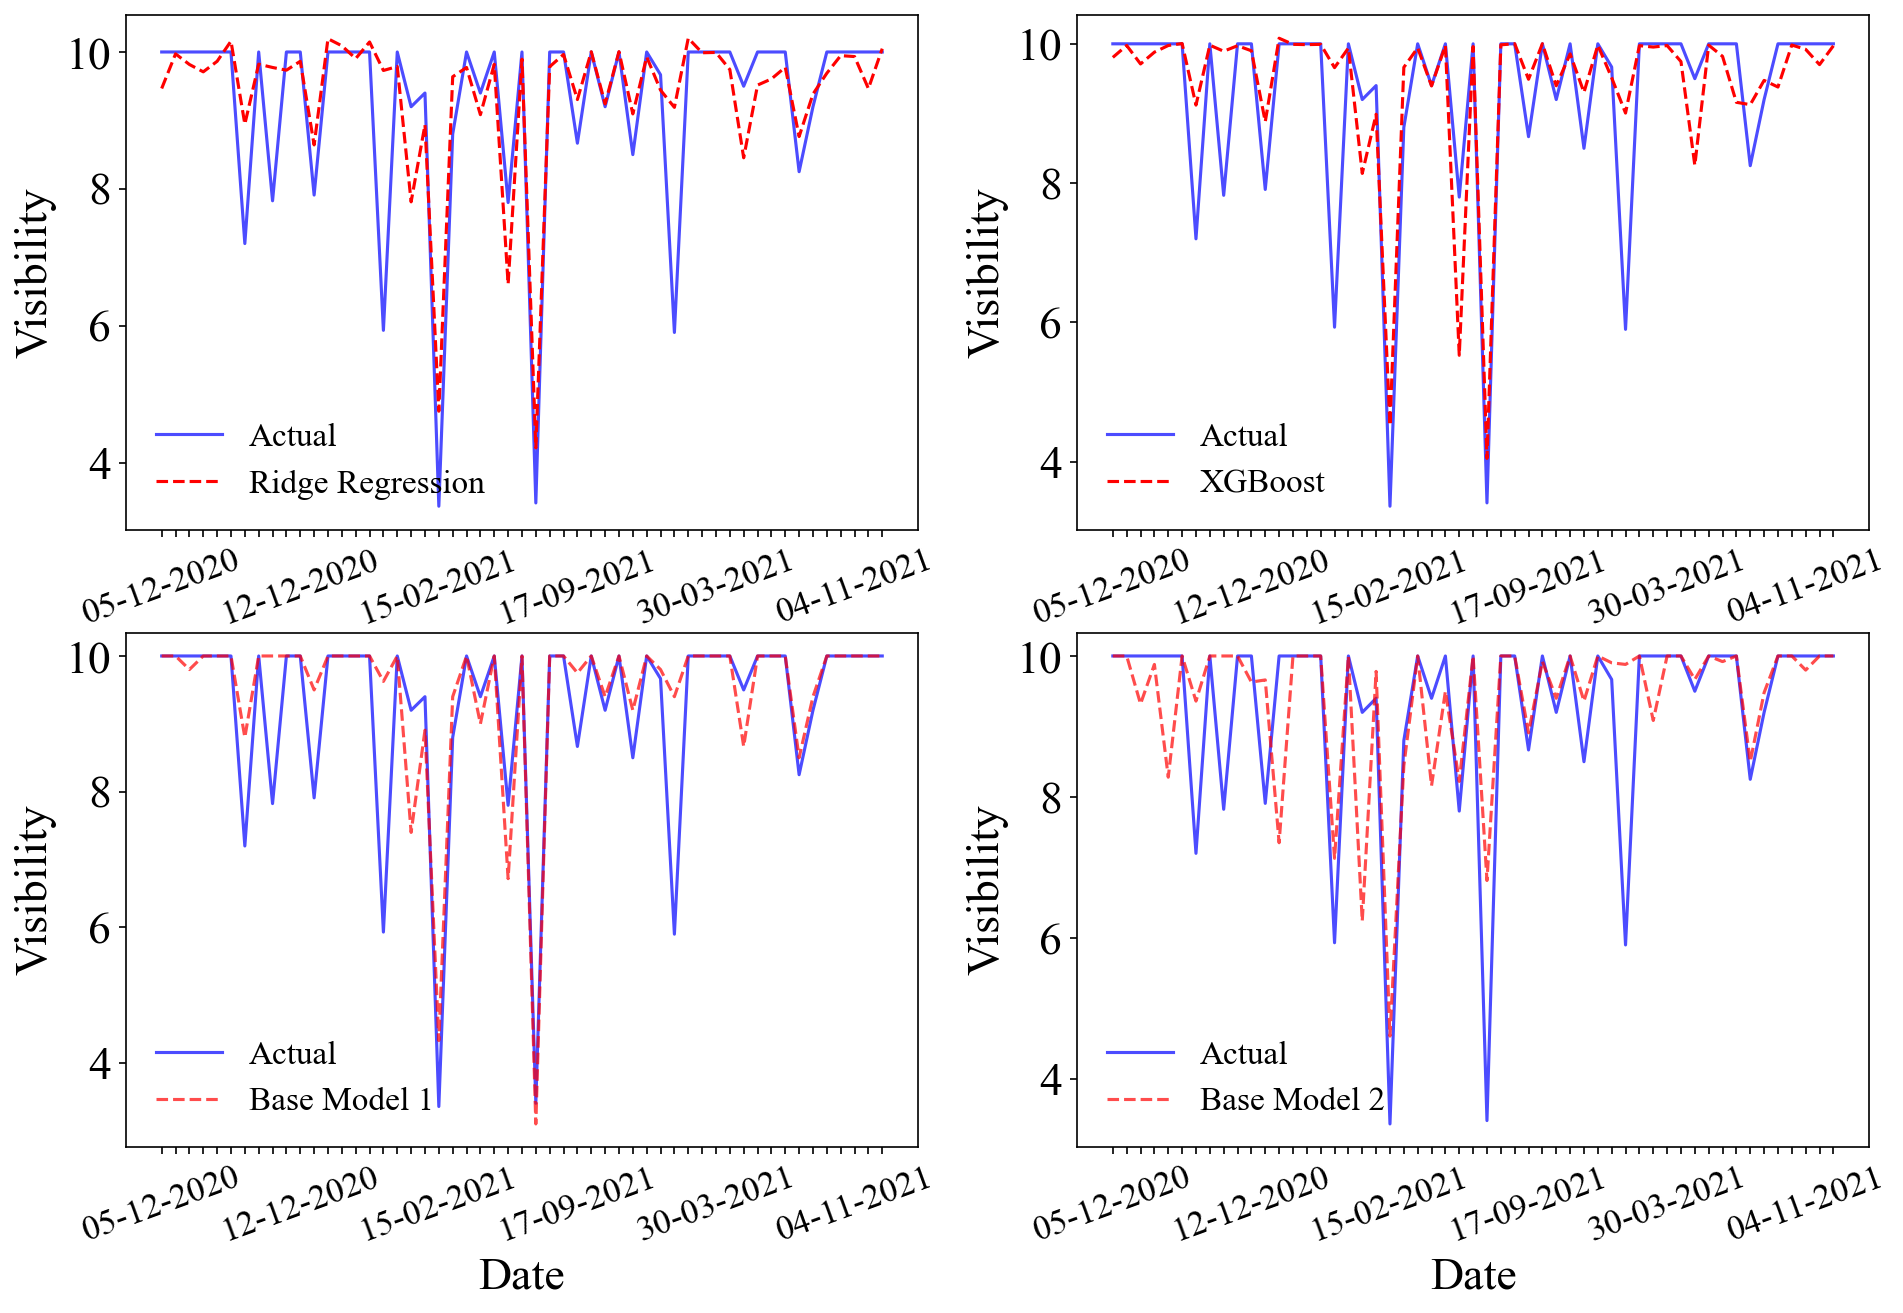

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

rr_predict = ridreg2.predict(X_test)
xgb_predict = xgb_model2.predict(X_test)
bm1 = X_test_copy['vsby_t-1']
bm2 = y_predict_avg

fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,10)

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams.update({'font.size': 22})
mpl.rcParams["font.weight"] = "normal"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["savefig.dpi"] = "150"
mpl.rcParams["figure.dpi"] = "150"

sampled_timestamps = [test_timestamps.iloc[i] for i in range(0, len(test_timestamps), 50)]
rr_predicts = [rr_predict[i] for i in range(0, len(rr_predict), 50)]
xgb_predicts = [xgb_predict[i] for i in range(0, len(xgb_predict), 50)]
bm1s = [bm1.iloc[i] for i in range(0, len(bm1), 50)]
bm2s = [bm2.iloc[i] for i in range(0, len(bm2), 50)]
bases = [y_test.iloc[i] for i in range(0, len(y_test), 50) ]
ax[0,0].plot(sampled_timestamps,bases,label = "Actual",linewidth=1.5, color="blue",linestyle='solid', alpha=0.7)
ax[0,0].plot(sampled_timestamps,rr_predicts,label = "Ridge Regression",linewidth=1.5, color="red",linestyle='--')
ax[0,1].plot(sampled_timestamps,bases,label = "Actual",linewidth=1.5, color="blue",linestyle='solid', alpha=0.7)
ax[0,1].plot(sampled_timestamps,xgb_predicts,label = "XGBoost",linewidth=1.5, color="red",linestyle='--')
ax[1,0].plot(sampled_timestamps,bases,label = "Actual",linewidth=1.5, color="blue",linestyle='solid', alpha=0.7)
ax[1,0].plot(sampled_timestamps,bm1s,label = "Base Model 1",linewidth=1.5, color="red",linestyle='--', alpha=0.7)
ax[1,1].plot(sampled_timestamps,bases,label = "Actual",linewidth=1.5, color="blue",linestyle='solid', alpha=0.7)
ax[1,1].plot(sampled_timestamps,bm2s,label = "Base Model 2",linewidth=1.5, color="red",linestyle='--', alpha=0.7)

for axe in ax.flat:
    axe.set_xlabel('Date')
    axe.set_ylabel('Visibility')
    sample_ticks = [sampled_timestamps[i].split()[0] if i%10 == 0 else "" for i in range(len(sampled_timestamps))]
    axe.set_xticklabels(sample_ticks, fontsize=17)
    axe.tick_params(axis='x', rotation=20)
    axe.legend(fontsize=16, frameon=False, loc='lower left')
plt.savefig(r'/Users/manojprabhakarpaidiparthy/Documents/MS/p2_results.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

<ipython-input-45-cc3cc228693a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sample_ticks, fontsize=17)


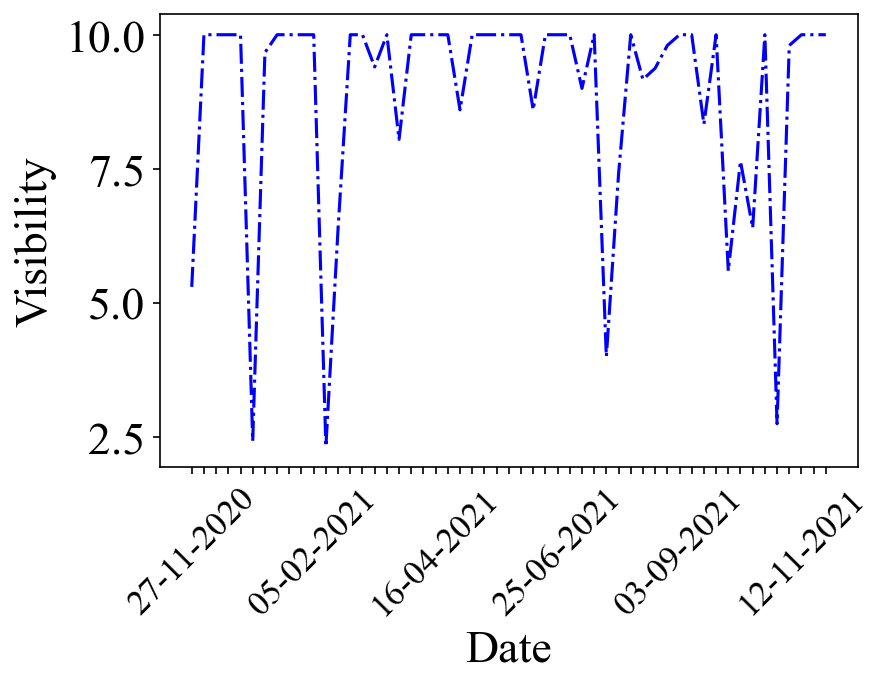

In [45]:
fig, ax = plt.subplots()

sampled_values = [df.iloc[i]['valid'] for i in range(0, len(df), 24*7)]
sampled_visibility = [df.iloc[i]['vsby'] for i in range(0, len(df), 24*7)]
sample_ticks = [sampled_values[i].split()[0] if i%10 == 0 else "" for i in range(len(sampled_values))]
ax.plot(sampled_values, sampled_visibility, linewidth=1.5, color="blue", linestyle="-.")
ax.set_xlabel('Date')
ax.set_ylabel('Visibility')
ax.set_xticklabels(sample_ticks, fontsize=17)
ax.tick_params(axis='x', rotation=45)
plt.savefig(r'/Users/manojprabhakarpaidiparthy/Documents/MS/time_vs_visibility.pdf', format='pdf', bbox_inches='tight', dpi=300)
